<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/Praktikum_Data_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Unduh dataset dari URL
url = "https://github.com/databricks/Spark-The-Definitive-Guide/blob/master/data/retail-data/all/online-retail-dataset.csv?raw=true"
df = pd.read_csv(url)

# Tampilkan 5 baris pertama untuk verifikasi
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
print("Info Dataset:")
df.info()

print("Jumlah Nilai Hilang:\n", df.isnull().sum())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Jumlah Nilai Hilang:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [3]:
# Hapus baris dengan CustomerID kosong dan transaksi yang tidak valid
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# Tampilkan 5 baris pertama untuk memastikan hasil pembersihan data
print("Data setelah pembersihan:")
print(df_cleaned.head())

# Tampilkan jumlah baris sebelum dan sesudah pembersihan data
print("\nJumlah baris sebelum pembersihan: ", len(df))
print("Jumlah baris setelah pembersihan: ", len(df_cleaned))


Data setelah pembersihan:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Jumlah baris sebelum pembersihan:  541909
Jumlah baris setelah pembersihan:  397884


In [4]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day

# Tampilkan hasil akhir untuk memverifikasi kolom TotalPrice, Year, Month, dan Day
print("Hasil akhir setelah penambahan kolom:")
print(df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice', 'InvoiceDate', 'Year', 'Month', 'Day']].head(30))

Hasil akhir setelah penambahan kolom:
    Quantity  UnitPrice  TotalPrice         InvoiceDate  Year  Month  Day
0          6       2.55       15.30 2010-12-01 08:26:00  2010     12    1
1          6       3.39       20.34 2010-12-01 08:26:00  2010     12    1
2          8       2.75       22.00 2010-12-01 08:26:00  2010     12    1
3          6       3.39       20.34 2010-12-01 08:26:00  2010     12    1
4          6       3.39       20.34 2010-12-01 08:26:00  2010     12    1
5          2       7.65       15.30 2010-12-01 08:26:00  2010     12    1
6          6       4.25       25.50 2010-12-01 08:26:00  2010     12    1
7          6       1.85       11.10 2010-12-01 08:28:00  2010     12    1
8          6       1.85       11.10 2010-12-01 08:28:00  2010     12    1
9         32       1.69       54.08 2010-12-01 08:34:00  2010     12    1
10         6       2.10       12.60 2010-12-01 08:34:00  2010     12    1
11         6       2.10       12.60 2010-12-01 08:34:00  2010     12    1


In [5]:
# Contoh data wilayah
region_data = {
    'Country': ['United Kingdom', 'France', 'Germany', 'EIRE', 'Spain'],
    'Region': ['Europe', 'Europe', 'Europe', 'Europe', 'Europe']
}
region_df = pd.DataFrame(region_data)

# Gabungkan data wilayah dengan dataset utama
df_merged = pd.merge(df_cleaned, region_df, on='Country', how='left')

# Tampilkan 10 baris pertama dari hasil gabungan untuk verifikasi
print("Hasil akhir setelah penggabungan data wilayah:")
print(df_merged[['Country', 'Region', 'Quantity', 'UnitPrice', 'TotalPrice', 'Year', 'Month', 'Day']].head(10))


Hasil akhir setelah penggabungan data wilayah:
          Country  Region  Quantity  UnitPrice  TotalPrice  Year  Month  Day
0  United Kingdom  Europe         6       2.55       15.30  2010     12    1
1  United Kingdom  Europe         6       3.39       20.34  2010     12    1
2  United Kingdom  Europe         8       2.75       22.00  2010     12    1
3  United Kingdom  Europe         6       3.39       20.34  2010     12    1
4  United Kingdom  Europe         6       3.39       20.34  2010     12    1
5  United Kingdom  Europe         2       7.65       15.30  2010     12    1
6  United Kingdom  Europe         6       4.25       25.50  2010     12    1
7  United Kingdom  Europe         6       1.85       11.10  2010     12    1
8  United Kingdom  Europe         6       1.85       11.10  2010     12    1
9  United Kingdom  Europe        32       1.69       54.08  2010     12    1


In [6]:
yearly_sales = df_merged.groupby(['Year', 'Region'])['TotalPrice'].sum().reset_index()
print(yearly_sales)


   Year  Region   TotalPrice
0  2010  Europe   534176.910
1  2011  Europe  7539228.844


In [7]:
product_sales = df_merged.groupby('Description')[['Quantity', 'TotalPrice']].sum().sort_values(by='TotalPrice', ascending=False).reset_index()
print(product_sales.head(10))


                          Description  Quantity  TotalPrice
0         PAPER CRAFT , LITTLE BIRDIE     80995   168469.60
1            REGENCY CAKESTAND 3 TIER     12402   142592.95
2  WHITE HANGING HEART T-LIGHT HOLDER     36725   100448.15
3             JUMBO BAG RED RETROSPOT     46181    85220.78
4      MEDIUM CERAMIC TOP STORAGE JAR     77916    81416.73
5                             POSTAGE      3120    77803.96
6                       PARTY BUNTING     15291    68844.33
7       ASSORTED COLOUR BIRD ORNAMENT     35362    56580.34
8                              Manual      7173    53779.93
9                  RABBIT NIGHT LIGHT     27202    51346.20


In [10]:
# Tampilkan 10 baris pertama dari DataFrame yang akan digunakan untuk visualisasi
print(yearly_sales.head(10))

# Periksa nilai unik untuk kolom Country dan Year untuk memastikan data yang tepat
print("Negara yang tersedia:", yearly_sales['Region'].unique())
print("Tahun yang tersedia:", yearly_sales['Year'].unique())


   Year  Region   TotalPrice
0  2010  Europe   534176.910
1  2011  Europe  7539228.844
Negara yang tersedia: ['Europe']
Tahun yang tersedia: [2010 2011]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


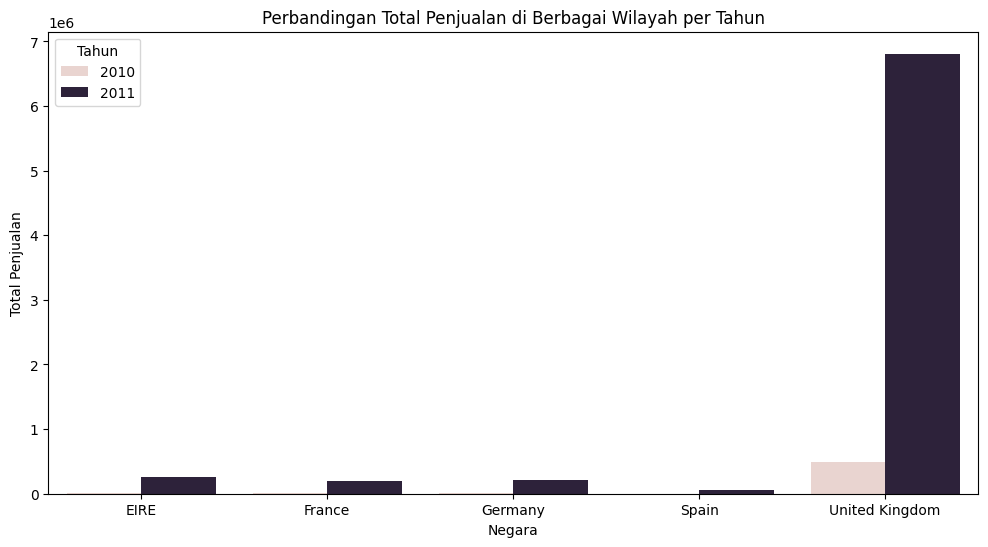

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan DataFrame hasil gabungan sudah terbentuk
yearly_sales = df_merged.groupby(['Year', 'Region', 'Country'])['TotalPrice'].sum().reset_index()

# Visualisasi total penjualan di berbagai negara berdasarkan tahun
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', hue='Year', data=yearly_sales)
plt.title('Perbandingan Total Penjualan di Berbagai Wilayah per Tahun')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan')
plt.legend(title='Tahun')
plt.show()


In [12]:
# Periksa apakah ada missing values di kolom Region
print(df_merged['Region'].isnull().sum())

# Tampilkan data penjualan per negara dan wilayah
print(df_merged[['Country', 'Region']].drop_duplicates())


16462
                     Country  Region
0             United Kingdom  Europe
26                    France  Europe
195                Australia     NaN
376              Netherlands     NaN
1098                 Germany  Europe
1225                  Norway     NaN
1393                    EIRE  Europe
4035             Switzerland     NaN
4250                   Spain  Europe
4437                  Poland     NaN
4815                Portugal     NaN
4860                   Italy     NaN
4909                 Belgium     NaN
5607               Lithuania     NaN
7392                   Japan     NaN
10515                Iceland     NaN
13116        Channel Islands     NaN
13133                Denmark     NaN
19238                 Cyprus     NaN
19576                 Sweden     NaN
23008                Finland     NaN
23213                Austria     NaN
41013                 Greece     NaN
42151              Singapore     NaN
43882                Lebanon     NaN
55608   United Arab Emirates    

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


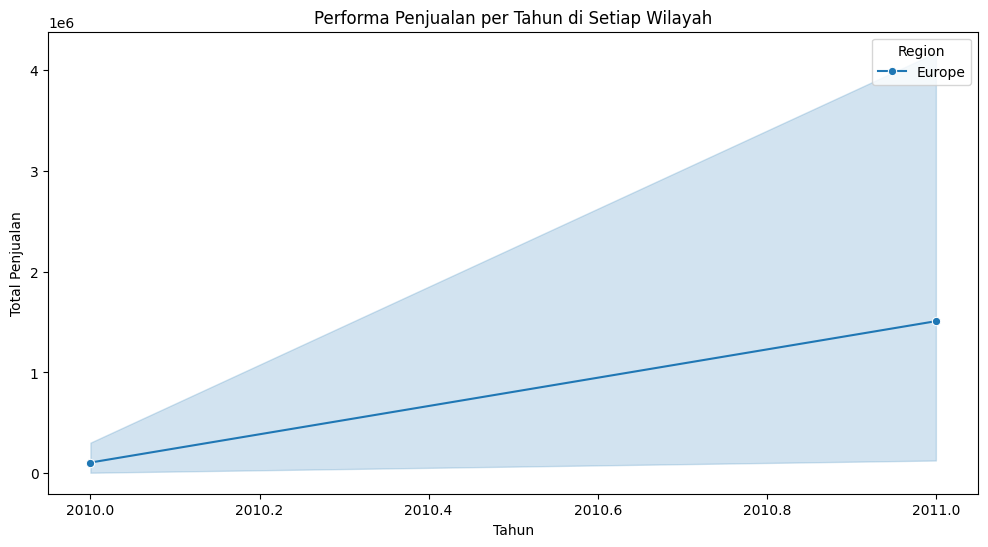

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='TotalPrice', hue='Region', marker='o')
plt.title('Performa Penjualan per Tahun di Setiap Wilayah')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.show()


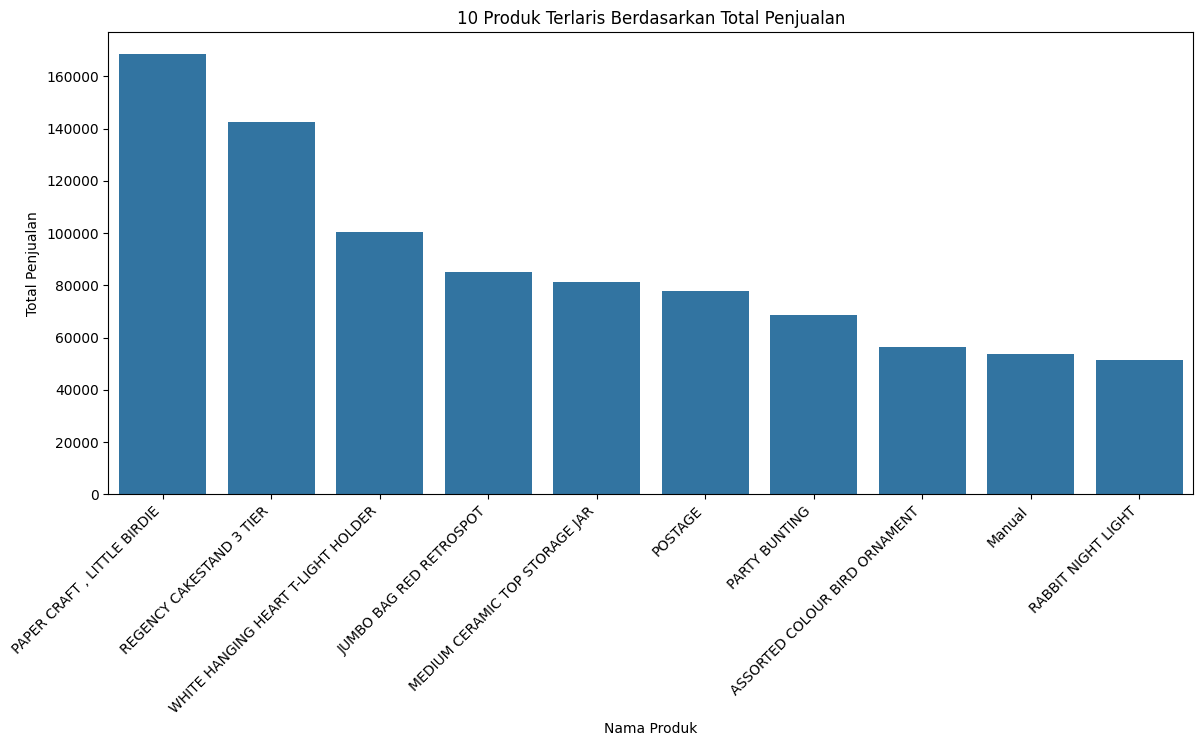

In [14]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Description', y='TotalPrice', data=product_sales.head(10))
plt.xticks(rotation=45, ha='right')
plt.title('10 Produk Terlaris Berdasarkan Total Penjualan')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.show()

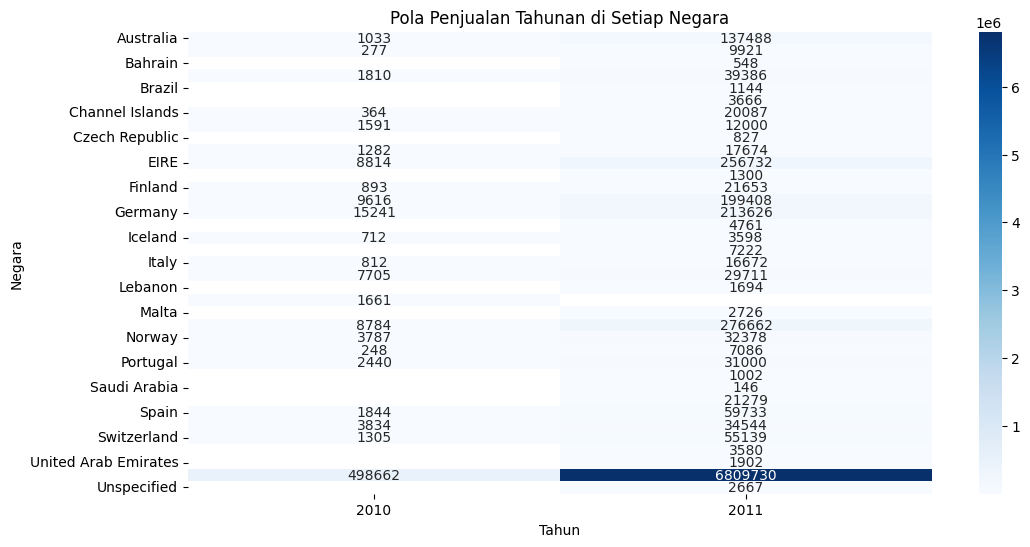

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat pivot table untuk heatmap: TotalPrice per Country dan Year
pivot_data = df_merged.pivot_table(values='TotalPrice', index='Country', columns='Year', aggfunc='sum')

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues')
plt.title('Pola Penjualan Tahunan di Setiap Negara')
plt.xlabel('Tahun')
plt.ylabel('Negara')
plt.show()


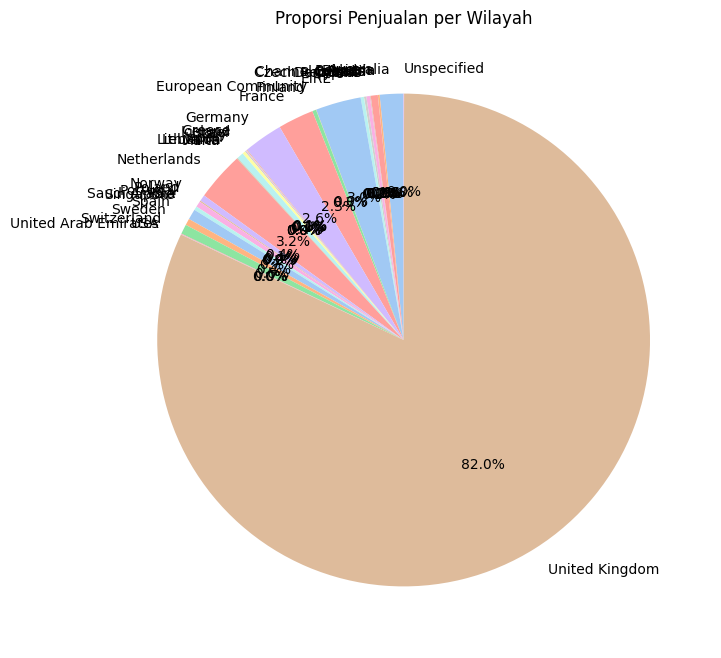

In [20]:
import matplotlib.pyplot as plt

# Agregasi total penjualan per wilayah
region_sales = df_merged.groupby('Country')['TotalPrice'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 8))
region_sales.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proporsi Penjualan per Wilayah')
plt.ylabel('')  # Menghapus label default pada sumbu y
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Siapkan data untuk pemodelan
X = df_cleaned[['Quantity']]
y = df_cleaned['TotalPrice']

# Buat model regresi linier
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


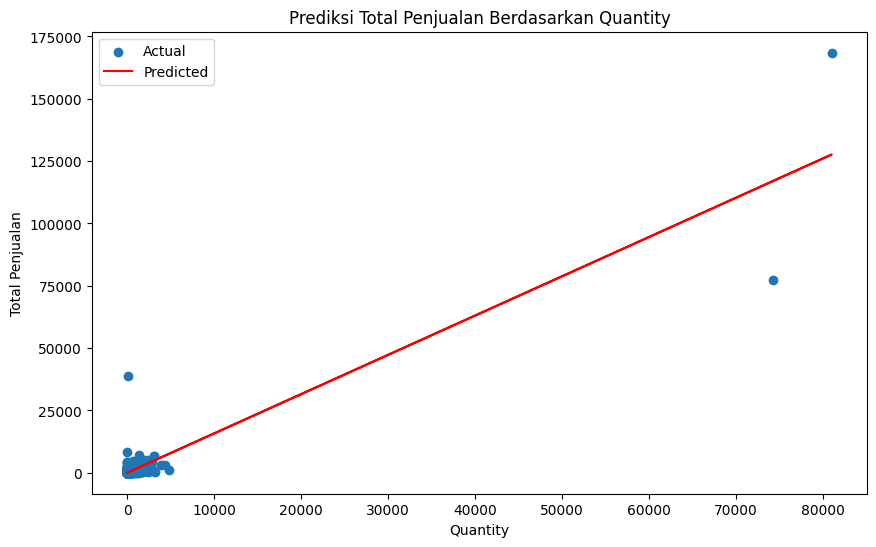

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.legend()
plt.title('Prediksi Total Penjualan Berdasarkan Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Penjualan')
plt.show()


In [23]:
from sklearn.metrics import r2_score

# Menghitung R2 Score untuk model regresi linier
r2 = r2_score(y, y_pred)

# Menampilkan nilai R2 Score
print(f"R2 Score: {r2:.2f}")

# Interpretasi hasil
if r2 > 0.75:
    print("Model memiliki performa yang baik, karena R2 Score lebih dari 0.75. Ini menunjukkan bahwa model dapat menjelaskan lebih dari 75% variabilitas data Total Penjualan berdasarkan Quantity.")
elif 0.50 < r2 <= 0.75:
    print("Model memiliki performa yang cukup baik, karena R2 Score berada di antara 0.50 hingga 0.75. Model ini dapat menjelaskan sebagian besar variabilitas data, tetapi masih bisa ditingkatkan.")
else:
    print("Model memiliki performa yang rendah, karena R2 Score kurang dari 0.50. Ini menunjukkan bahwa model belum mampu menjelaskan variabilitas data dengan baik. Perlu dilakukan optimasi lebih lanjut.")


R2 Score: 0.84
Model memiliki performa yang baik, karena R2 Score lebih dari 0.75. Ini menunjukkan bahwa model dapat menjelaskan lebih dari 75% variabilitas data Total Penjualan berdasarkan Quantity.
